In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

## Path

In [2]:
parent_dir = os.path.abspath(r'D:')
concatenated_yaws_dir = os.path.join(parent_dir, 'processed_data', 'Concatenated_Yaws')
#inputoutput_dir = os.path.join(parent_dir, 'processed_data', 'InputOutput')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')


In [3]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [6]:

X_train = big_train_df.drop(columns_to_drop, axis=1)
y_train = big_train_df['wind_speed_mean']

X_test = big_test_df.drop(columns_to_drop, axis=1)
y_test = big_test_df['wind_speed_mean']

In [7]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R2 Score:', rf_r2)
print('-----------------------------')
print('Decision Tree Metrics:')
print('MAE:', dt_mae)
print('MSE:', dt_mse)
print('RMSE:', dt_rmse)
print('R2 Score:', dt_r2)


Random Forest Metrics:
MAE: 0.13496493248164218
MSE: 0.045546043310672864
RMSE: 0.21341518997173764
R2 Score: 0.9987727536002069
-----------------------------
Decision Tree Metrics:
MAE: 0.14650866540325505
MSE: 0.08574594870888594
RMSE: 0.2928240917494425
R2 Score: 0.9976895598563407


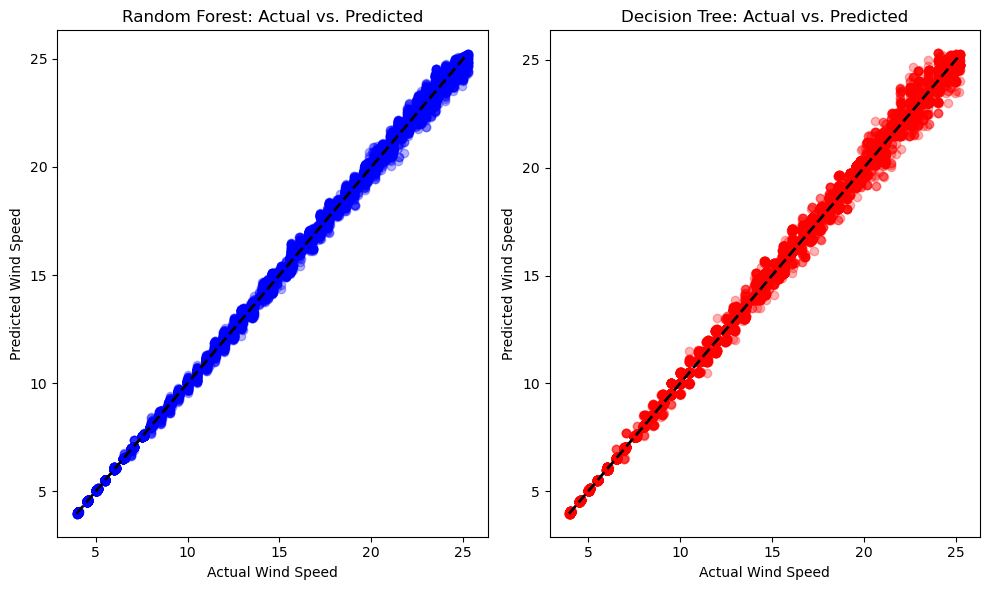

In [8]:


# Plotting the results
plt.figure(figsize=(10, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Random Forest: Actual vs. Predicted')

# Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='red', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Decision Tree: Actual vs. Predicted')

plt.tight_layout()
plt.show()


Random Forest Metrics:
MAE: 3.7972306728513714
MSE: 33.11765824893787
RMSE: 5.754794370691092
R2 Score: 0.7634755472909086
-----------------------------
Decision Tree Metrics:
MAE: 5.180270207355681
MSE: 78.79362707572035
RMSE: 8.87657744154358
R2 Score: 0.4372603467019983


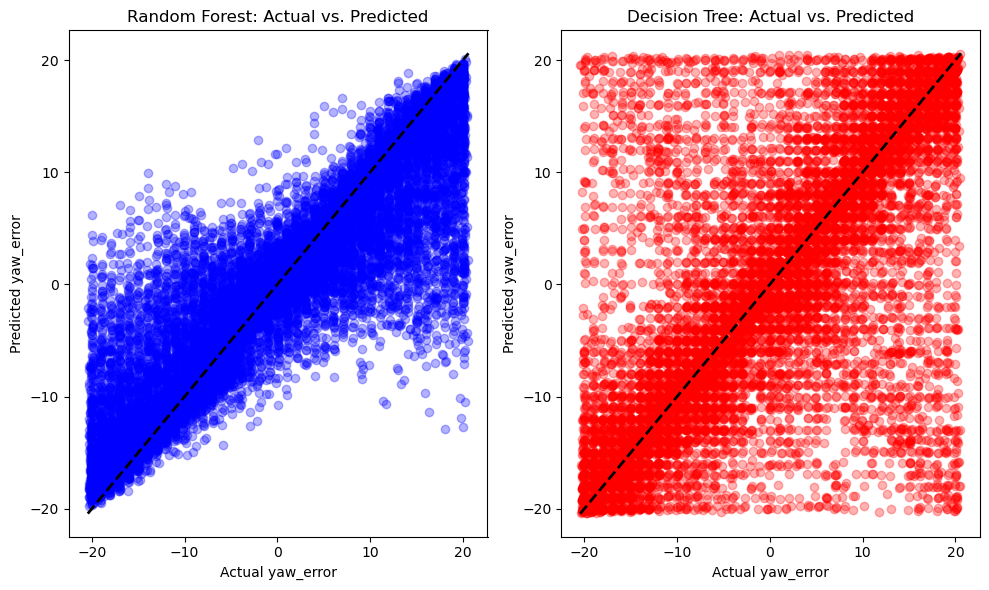

In [9]:
X_train = big_train_df.drop(columns_to_drop, axis=1)
y_train = big_train_df['yaw_error_mean']

X_test = big_test_df.drop(columns_to_drop, axis=1)
y_test = big_test_df['yaw_error_mean']

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R2 Score:', rf_r2)
print('-----------------------------')
print('Decision Tree Metrics:')
print('MAE:', dt_mae)
print('MSE:', dt_mse)
print('RMSE:', dt_rmse)
print('R2 Score:', dt_r2)


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual yaw_error')
plt.ylabel('Predicted yaw_error')
plt.title('Random Forest: Actual vs. Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='red', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual yaw_error')
plt.ylabel('Predicted yaw_error')
plt.title('Decision Tree: Actual vs. Predicted')

plt.tight_layout()
plt.show()


Random Forest Metrics:
MAE: 0.001958132260934657
MSE: 9.967631167365219e-06
RMSE: 0.0031571555500743416
R2 Score: 0.9866694691585283
-----------------------------
Decision Tree Metrics:
MAE: 0.0026581621747678685
MSE: 2.4315180452890498e-05
RMSE: 0.004931042532050448
R2 Score: 0.9674813145168888


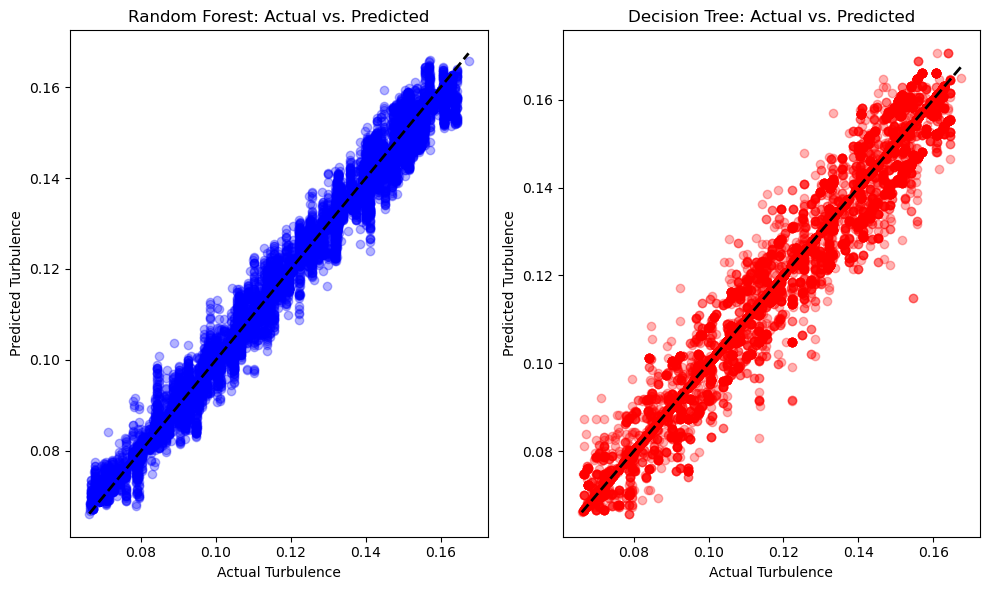

In [10]:
X_train = big_train_df.drop(columns_to_drop, axis=1)
y_train = big_train_df['Turbulence']

X_test = big_test_df.drop(columns_to_drop, axis=1)
y_test = big_test_df['Turbulence']

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R2 Score:', rf_r2)
print('-----------------------------')
print('Decision Tree Metrics:')
print('MAE:', dt_mae)
print('MSE:', dt_mse)
print('RMSE:', dt_rmse)
print('R2 Score:', dt_r2)


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Turbulence')
plt.ylabel('Predicted Turbulence')
plt.title('Random Forest: Actual vs. Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='red', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Turbulence')
plt.ylabel('Predicted Turbulence')
plt.title('Decision Tree: Actual vs. Predicted')

plt.tight_layout()
plt.show()
